# 실습

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

%matplotlib inline

In [2]:
X, y = make_moons(n_samples=2000, noise=0.1, random_state=925)
x1 = X[:, 0]
x2 = X[:, 1]

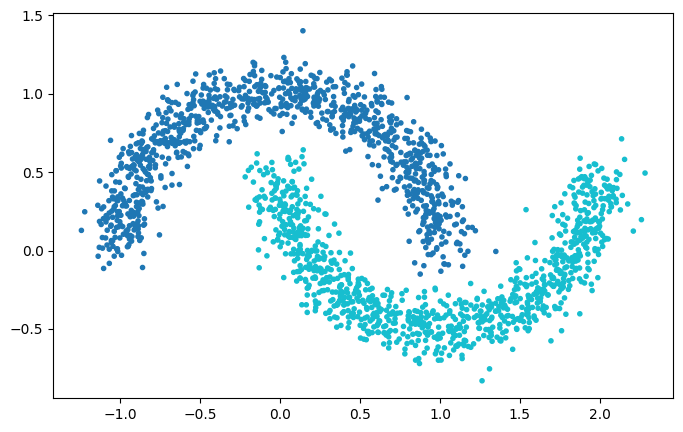

In [3]:
plt.figure(figsize=(8,5))
plt.scatter(x1, x2, c=y, marker='.', cmap='tab10')

In [4]:
x1_0 = x1[np.where(y==0)]
x2_0 = x2[np.where(y==0)]
y_0 = y[np.where(y==0)]

x1_1 = x1[np.where(y==1)]
x2_1 = x2[np.where(y==1)]
y_1 = y[np.where(y==1)]

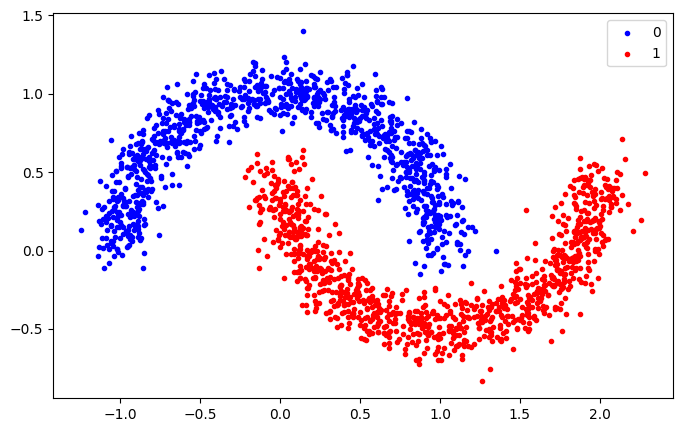

In [5]:
plt.figure(figsize=(8,5))
plt.scatter(x1_0, x2_0, c='b', marker='.', label='0')
plt.scatter(x1_1, x2_1, c='r', marker='.', label='1')
plt.legend()

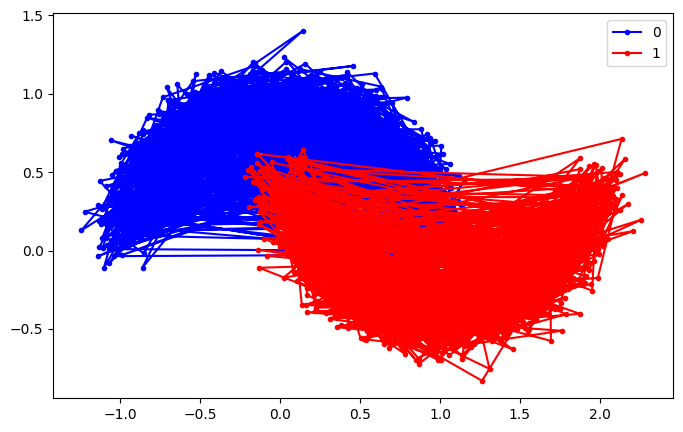

In [6]:
plt.figure(figsize=(8,5))
plt.plot(x1_0, x2_0, c='b', marker='.', label='0')
plt.plot(x1_1, x2_1, c='r', marker='.', label='1')
plt.legend()

In [7]:
from sklearn.naive_bayes import GaussianNB as GNB

In [8]:
model = GNB() # default : priors[0.5, 0.5])
model.fit(X, y) # X : data, y : label

GaussianNB()

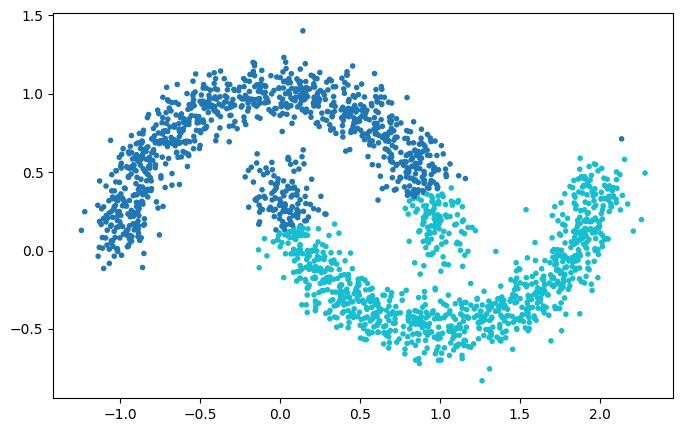

In [9]:
plt.figure(figsize=(8,5))
plt.scatter(
    x1, x2,
    c=model.predict(X),
    marker='.',
    cmap='tab10'
)

In [10]:
model = GNB(priors=[.99, .01])
model.fit(X, y)

GaussianNB(priors=[0.99, 0.01])

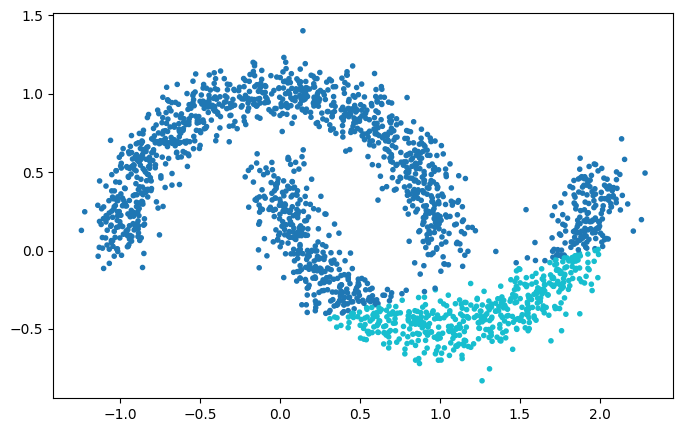

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(
    x1, x2,
    c=model.predict(X),
    marker='.',
    cmap='tab10'
)

In [12]:
model = GNB(priors=[.01, .99])
model.fit(X, y)

GaussianNB(priors=[0.01, 0.99])

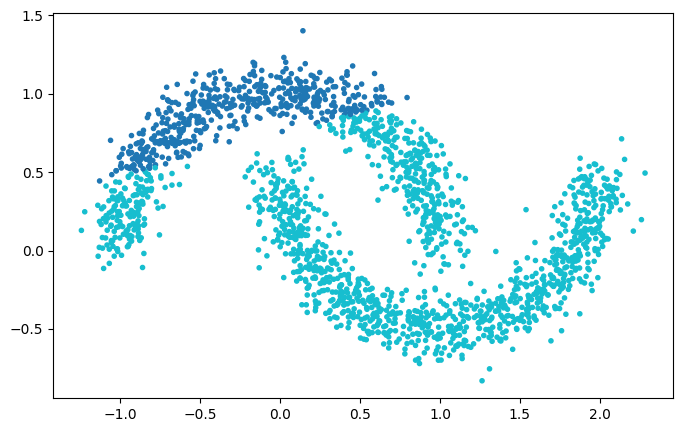

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(
    x1, x2,
    c=model.predict(X),
    marker='.',
    cmap='tab10'
)

# 과제

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB as GNB

%matplotlib inline

In [15]:
# 데이터 불러오기
iris = pd.read_csv("./data/iris.csv")

iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [16]:
# 필요없는 column 삭제 (remove id col)
iris = iris.drop('id', axis=1) # axis=1 is column
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [17]:
x = iris.iloc[:, :-1]
y = iris['species']
print(x.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [18]:
# label encoding
target_dict = {}

for i, v in enumerate(iris['species'].unique()):
    target_dict[i] = v
target_dict

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [19]:
label_encoded_species = np.zeros((len(iris['species']), ), dtype=int)

for i in range(len(target_dict)):
    label_encoded_species[iris['species'] == target_dict[i]] = i

print(iris['species'][0], label_encoded_species[0])
print(iris['species'][50], label_encoded_species[50])
print(iris['species'][100], label_encoded_species[100])

print(label_encoded_species)

setosa 0
versicolor 1
virginica 2
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [20]:
model = GNB()
model.fit(x, label_encoded_species)

GaussianNB()

In [21]:
from itertools import product

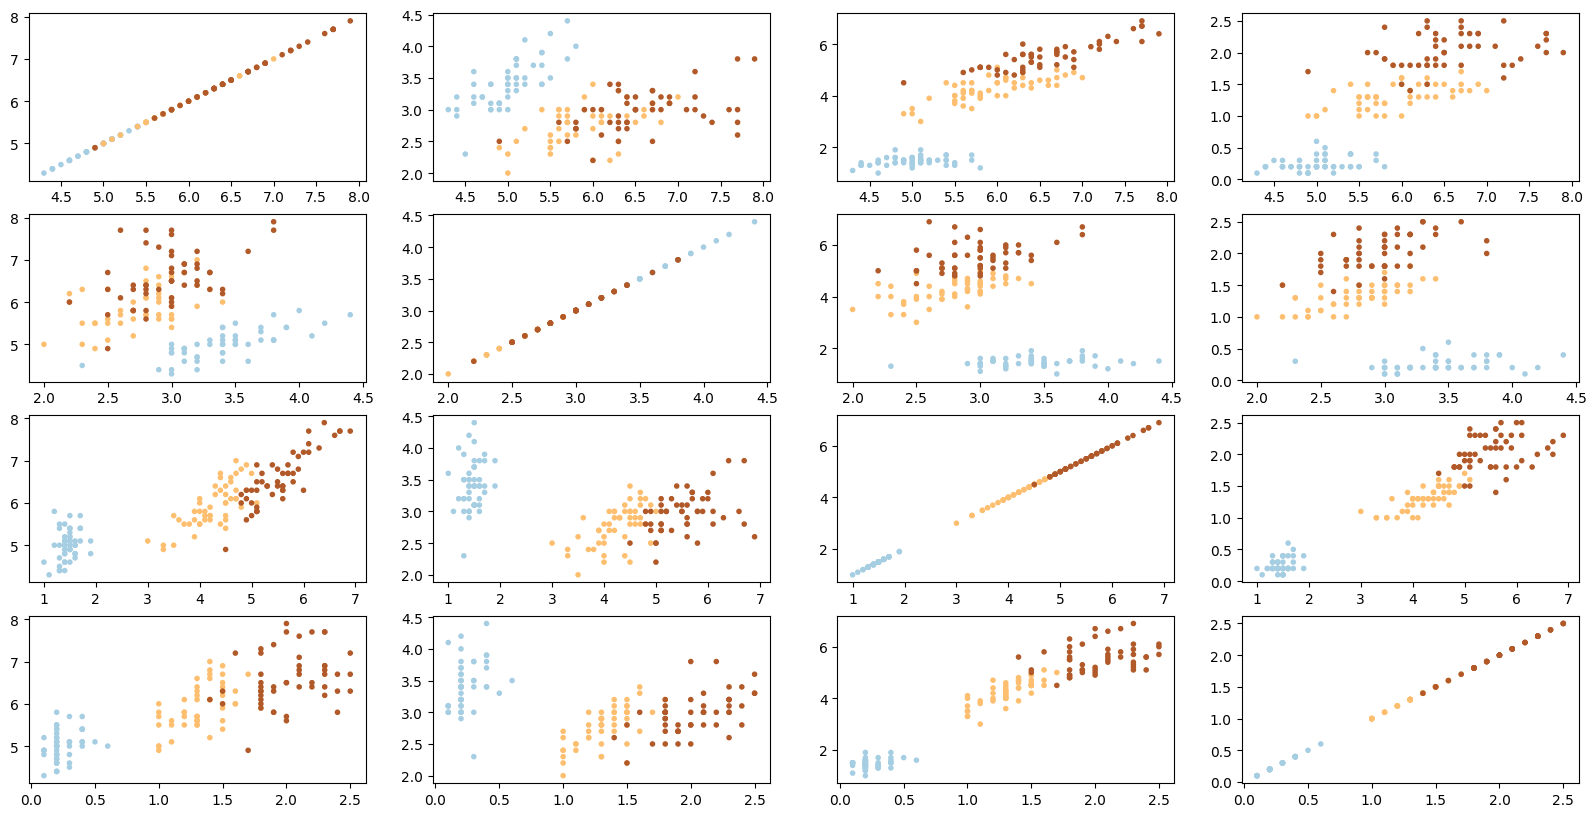

In [23]:
pairs = product(range(x.shape[1]), range(x.shape[1]))
fig, axes = plt.subplots(4, 4, figsize=(20,10))

for c1, c2 in pairs:
    axes[c1][c2].scatter(iris[iris.columns[c1]], iris[iris.columns[c2]], c=label_encoded_species, marker='.', cmap='Paired')
plt.show()

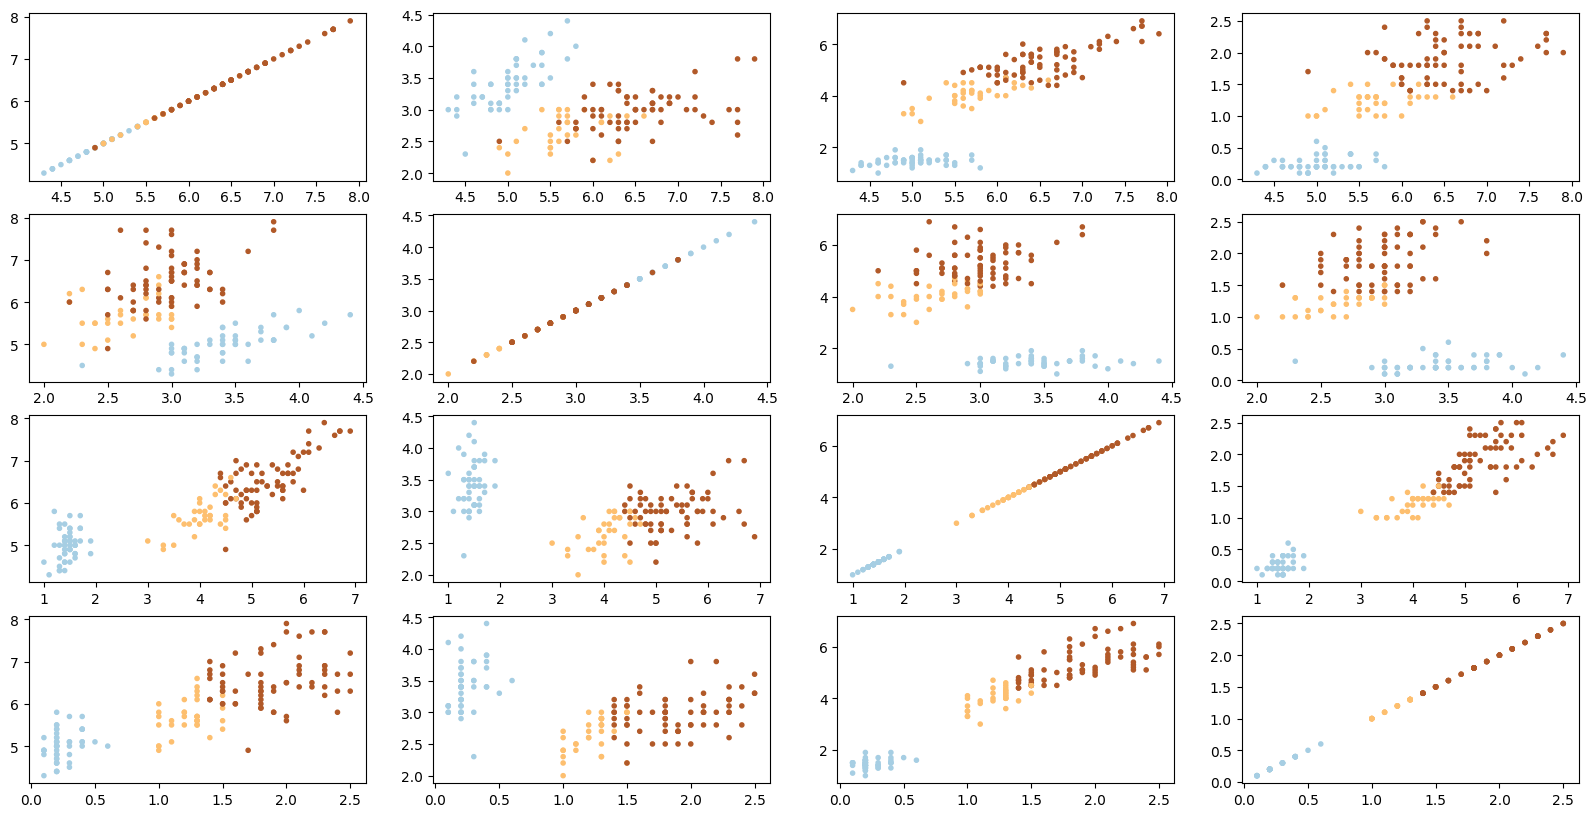

In [25]:
# test1 priors = [.01, .01, .98]
model = GNB(priors = [.01, .01, .98])
model.fit(x, label_encoded_species)

pairs = product(range(x.shape[1]), range(x.shape[1]))
fig, axes = plt.subplots(4, 4, figsize=(20,10))

for c1, c2 in pairs:
    axes[c1][c2].scatter(iris[iris.columns[c1]], iris[iris.columns[c2]], c=model.predict(x), marker='.', cmap='Paired')
plt.show()

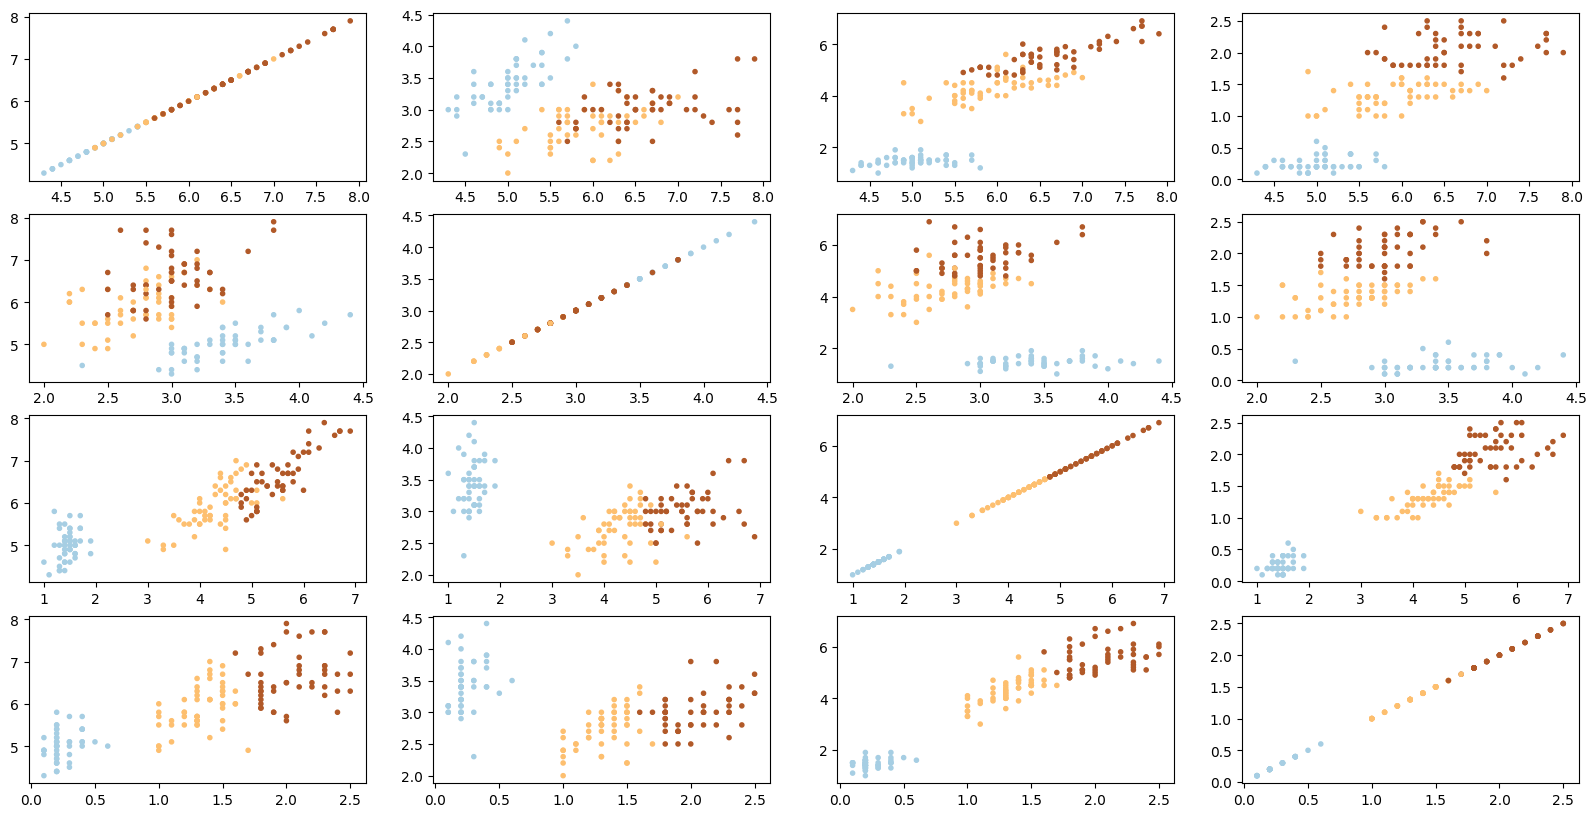

In [26]:
# test2 priors = [.50, .30, .20]
model = GNB(priors = [.50, .30, .20])
model.fit(x, label_encoded_species)

pairs = product(range(x.shape[1]), range(x.shape[1]))
fig, axes = plt.subplots(4, 4, figsize=(20,10))

for c1, c2 in pairs:
    axes[c1][c2].scatter(iris[iris.columns[c1]], iris[iris.columns[c2]], c=model.predict(x), marker='.', cmap='Paired')
plt.show()

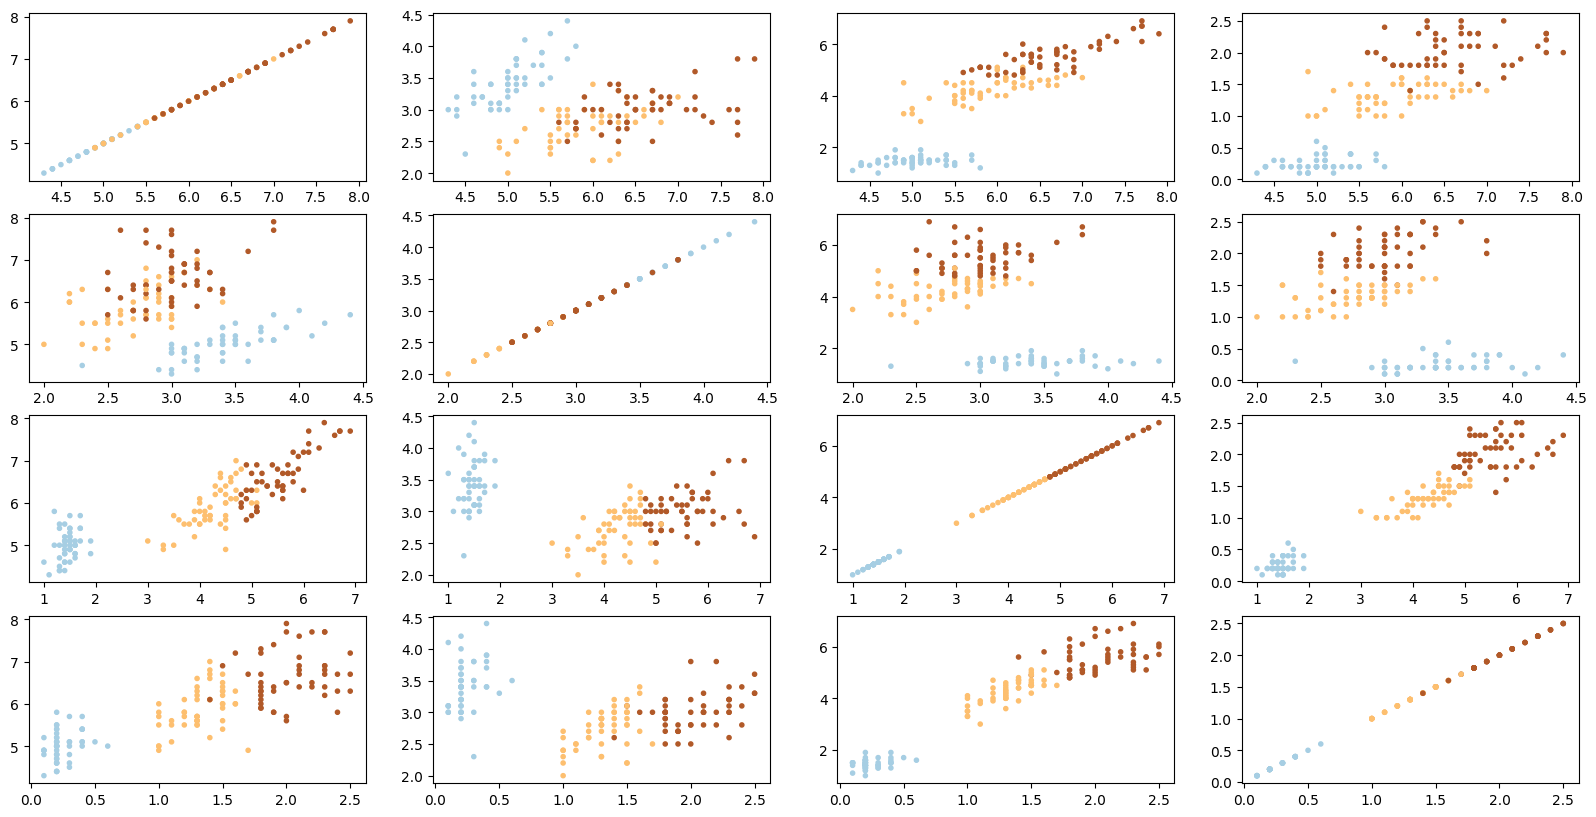

In [27]:
# test3 priors = [.25, .35, .40]
model = GNB(priors = [.25, .35, .40])
model.fit(x, label_encoded_species)

pairs = product(range(x.shape[1]), range(x.shape[1]))
fig, axes = plt.subplots(4, 4, figsize=(20,10))

for c1, c2 in pairs:
    axes[c1][c2].scatter(iris[iris.columns[c1]], iris[iris.columns[c2]], c=model.predict(x), marker='.', cmap='Paired')
plt.show()